In [149]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

sheet = pd.read_csv("practice.csv")

storep = pd.DataFrame(sheet)



x = storep.StudyHours.mean()


#REVISION REQUIRED
storep["StudyHours"] = storep["StudyHours"].fillna(x)
storep = storep.rename(columns = {"Name":"Na"})
#storep = storep.map({"StudyHours":"StdHrs"})
#header = pd.read_csv("practice.csv", names = ["ID", Na", "StdHrs", "MT", "PHY", "CSI"])
storep
#REVISION PART END



,ID,Na,StudyHours,Math,Physics,ComputerScience
0,1,Alice,5.500000,88,92,85
1,2,Bob,4.000000,75,78,72
2,3,Charlie,3.500000,60,65,58
3,4,Diana,6.000000,95,98,93
4,5,Eric,2.500000,50,55,52
5,6,Fatima,4.500000,82,88,80
6,7,Ghazi,4.222222,78,85,79
7,8,Huda,5.000000,90,94,91
8,9,Ibrahim,4.000000,70,73,68
9,10,Jenna,3.000000,65,67,60


5.606203881000099
0.8008862687142999
0.5141244077221544


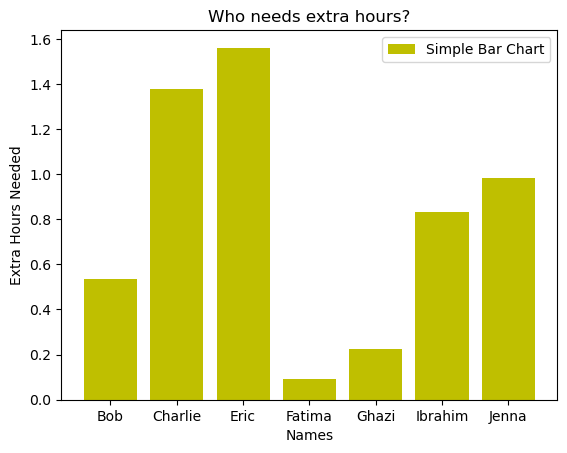

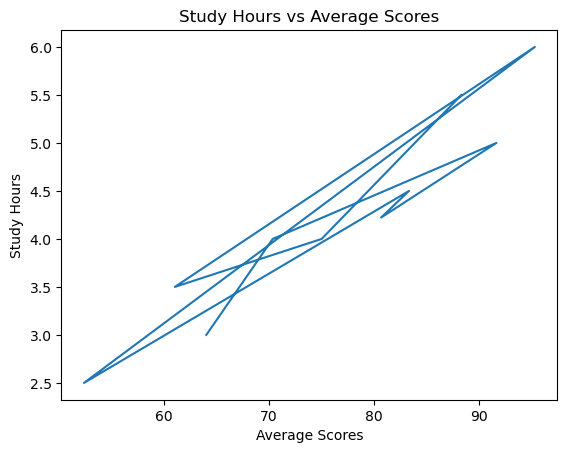

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("practice.csv")

#replacing empty StudyHour value with the mean of StudyHour column
mean = file.StudyHours.mean()
file["StudyHours"] = file["StudyHours"].fillna(mean)

#new column which contains average score of math, physics and cs
#filedf = pd.DataFrame(file)
file["AverageScores"] = file[["Math", "Physics", "ComputerScience"]].mean(axis = 1)
file

#students with average scores < 85
pdf = file[file["AverageScores"] < 85]

pdf["AverageScores"]

#GAP BETWEEN THE AVERAGE AND THE LESS THAN 85 SCORES
file["ScoreGap"] = 85 - pdf["AverageScores"]
file["ScoreGap"]

#SCORE EFFICIENCY but for each student
file["StudyEfficiency"] = file["AverageScores"] / file["StudyHours"]
file

#TIME NEEDED FOR SPECIAL STUDENTS
file["ExtraHoursNeeded"] = file["ScoreGap"] / file["StudyEfficiency"]
x = file["ExtraHoursNeeded"].dropna()

#Numpy array of EXTRAHOURSNEEDED
extrarr = np.array(x)

print(extrarr.sum())
print(extrarr.mean())
print(extrarr.std())


#plotting bar graphs
x1 = file.loc[file["ExtraHoursNeeded"].notna(), "Name"]

plt.bar(x1, x, label = "Simple Bar Chart", color = 'y')

plt.xlabel("Names")
plt.ylabel("Extra Hours Needed")
plt.title("Who needs extra hours?")
plt.legend()
plt.ioff()
plt.show()

#plotting line graph
x3 = file["StudyHours"]
y3 = file["AverageScores"]

plt.plot(y3, x3, label = "Study Hours vs Average Scores")
plt.ylabel("Study Hours")
plt.xlabel("Average Scores")
plt.title("Study Hours vs Average Scores")
plt.ioff()
plt.show()
#Groupby questions

PerformanceLevel
Poor         3
Good         3
Average      2
Excellent    2
Name: count, dtype: int64
   ID     Name  StudyHours  Math  Physics  ComputerScience  AverageScore  \
3   4    Diana         6.0    95       98               93     95.333333   
7   8     Huda         5.0    90       94               91     91.666667   
0   1    Alice         5.5    88       92               85     88.333333   
5   6   Fatima         4.5    82       88               80     83.333333   
6   7    Ghazi         NaN    78       85               79     80.666667   
1   2      Bob         4.0    75       78               72     75.000000   
8   9  Ibrahim         4.0    70       73               68     70.333333   
9  10    Jenna         3.0    65       67               60     64.000000   
2   3  Charlie         3.5    60       65               58     61.000000   
4   5     Eric         2.5    50       55               52     52.333333   

  PerformanceLevel   ScoreGap  ScoreRank  
3        Excellen

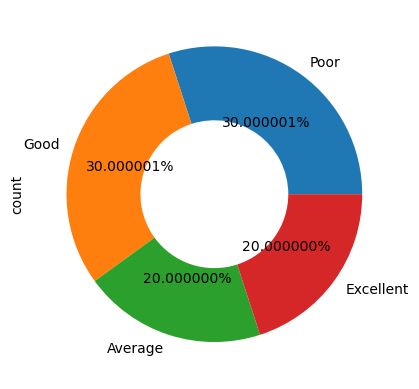

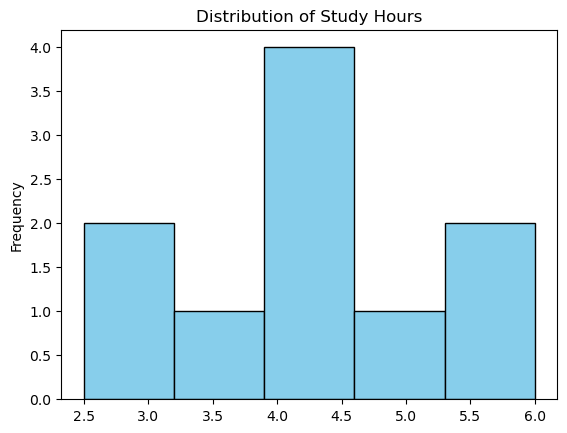

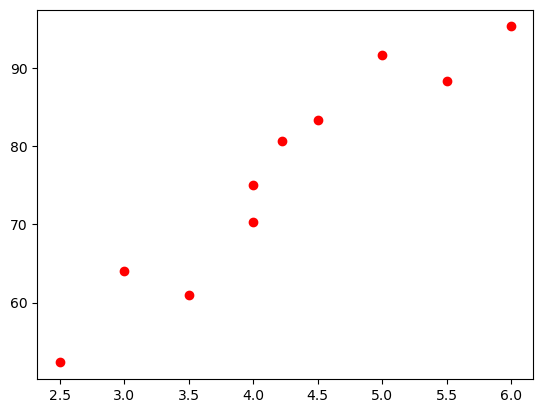

In [265]:
#PRACTICE 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("practice.csv")
file = pd.DataFrame(file)
file["AverageScore"] = file[["Math", "Physics", "ComputerScience"]].mean(axis=1)
#WRONG COMPLEX ATTEMPT bins = pd.IntervalIndex.from_tuples[(0, 69), (70, 79), (80, 89), (90, 100)])

#CREATING A PERFORMANCE LEVEL COLUMN
bins = [0, 70, 80, 90, 100]
labels = ["Poor", "Average", "Good", "Excellent"]
file["PerformanceLevel"] = pd.cut(file["AverageScore"], bins = bins, labels = labels, right = False)
print(file["PerformanceLevel"].value_counts())
file["ScoreGap"] = 85-file["AverageScore"]
#print(file["PerformanceLevel"].groupby("ScoreGap", "StudyHours"))

#RANKING AND SORTING STUDENTS
file["ScoreRank"] = file["AverageScore"].rank(ascending = False)

sorted = file.sort_values(["ScoreRank"])
print(sorted)

sorted.tail(3)[["Name", "StudyHours"]]

#pie chart
freq = file["PerformanceLevel"].value_counts()
freq.plot(kind = "pie", autopct = "%1f%%", wedgeprops = {'width' : 0.5})
plt.show()
# file["PerformanceLevel"].value_counts().plot(
#     kind="pie", autopct="%1.1f%%", startangle=90, shadow=True, ylabel=""
# )
# plt.title("Distribution of Student Performance Levels")
# plt.show()

#histogram
mean = file["StudyHours"].mean()
file["StudyHours"] = file["StudyHours"].fillna(mean)
file["StudyHours"].plot(kind="hist", bins=5, edgecolor="black", color="skyblue")
plt.title("Distribution of Study Hours")
plt.xlabel
plt.ylabel
plt.show()


#scattterplot
x4 = file["StudyHours"]
y4 = file["AverageScore"]
plt.scatter(x4, y4, c = 'red')
plt.xlabel
plt.ylabel
plt.ioff()
plt.show()


In [412]:
file

,ID,Name,StudyHours,Math,Physics,ComputerScience
0,1,Alice,5.5,88,92,85
1,2,Bob,4.0,75,78,72
2,3,Charlie,3.5,60,65,58
3,4,Diana,6.0,95,98,93
4,5,Eric,2.5,50,55,52
5,6,Fatima,4.5,82,88,80
6,7,Ghazi,NaN,78,85,79
7,8,Huda,5.0,90,94,91
8,9,Ibrahim,4.0,70,73,68
9,10,Jenna,3.0,65,67,60


In [444]:
file.iloc[0]

ID                     1
Name               Alice
StudyHours           5.5
Math                  88
Physics               92
ComputerScience       85
Name: 0, dtype: object

In [448]:
file[["Math", "Physics"]]

,Math,Physics
0,88,92
1,75,78
2,60,65
3,95,98
4,50,55
5,82,88
6,78,85
7,90,94
8,70,73
9,65,67


In [33]:
# Classification using pd.cut
bins = [0, 70, 80, 90, 100]
labels = ["Poor", "Average", "Good", "Excellent"]
file["PerformanceLevel"] = pd.cut(file["AverageScore"], bins=bins, labels=labels, right=False)
file


,ID,Name,StudyHours,Math,Physics,ComputerScience,AverageScore,PerformanceLevel
0,1,Alice,5.5,88,92,85,88.333333,Good
1,2,Bob,4.0,75,78,72,75.000000,Average
2,3,Charlie,3.5,60,65,58,61.000000,Poor
3,4,Diana,6.0,95,98,93,95.333333,Excellent
4,5,Eric,2.5,50,55,52,52.333333,Poor
5,6,Fatima,4.5,82,88,80,83.333333,Good
6,7,Ghazi,NaN,78,85,79,80.666667,Good
7,8,Huda,5.0,90,94,91,91.666667,Excellent
8,9,Ibrahim,4.0,70,73,68,70.333333,Average
9,10,Jenna,3.0,65,67,60,64.000000,Poor


In [207]:
file["ScoreGap"]

0    -3.333333
1    10.000000
2    24.000000
3   -10.333333
4    32.666667
5     1.666667
6     4.333333
7    -6.666667
8    14.666667
9    21.000000
Name: ScoreGap, dtype: float64

In [165]:
dir(plt)

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'BackendFilter',
 'Button',
 'Circle',
 'Colormap',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_NO_PYPLOT_NOTE',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_add_pyplot_note',
 '_api',
 '_auto_draw_if_interactive',
 '_

In [239]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x: 'float | ArrayLike', y: 'float | ArrayLike', s: 'float | ArrayLike | None' = None, c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None, marker: 'MarkerType | None' = None, cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, alpha: 'float | None' = None, linewidths: 'float | Sequence[float] | None' = None, *, edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None, plotnonfinite: 'bool' = False, data=None, **kwargs) -> 'PathCollection'
    A scatter plot of *y* vs. *x* with varying marker size and/or color.

    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.

    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.

        The 

PerformanceRating
poor         3.000000
average      4.000000
good         4.740741
excellent    5.500000
Name: StudyHours, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_12056\2970014787.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby("PerformanceRating")["StudyHours"].mean())


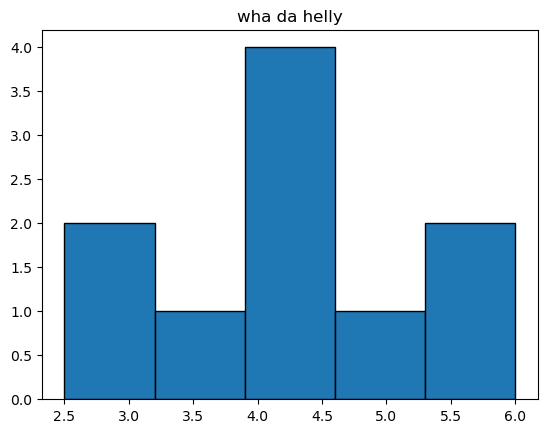

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("practice.csv")
data["StudyHours"] = data["StudyHours"].fillna(mean)

data["AverageScore"] = data[["Math", "Physics", "ComputerScience"]].mean(axis = 1)

#data["ScoreGap"] = 85 - data["AverageScore"]
data["ScoreGap"] = data["AverageScore"].apply(lambda x: 85 - x if x < 85 else 0)

bins = [0, 70, 80, 90, 100]
labels = ['poor', 'average', 'good', 'excellent']

data["PerformanceRating"] = pd.cut(data["AverageScore"], bins = bins, labels = labels, right = False)

print(data.groupby("PerformanceRating")["StudyHours"].mean())

x1 = data["StudyHours"]
plt.hist(x1, bins = 5, edgecolor = 'black')
plt.xlabel
plt.ylabel
plt.title("wha da helly")
plt.show()

In [5]:
import numpy as np

In [7]:
help

['ALLOW_THREADS',
 'BUFSIZE',
 'CLIP',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'WRAP',
 '_CopyMode',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__former_attrs__',
 '__future_scalars__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_builtins',
 '_distributor_init',
 '_financi